Missing values:
 title       0
price       0
model       0
features    0
dtype: int64

Data types:
 title       object
price       object
model       object
features    object
dtype: object

Statistical summary:
                                                   title       price  \
count                                                78          78   
unique                                               78          66   
top     ZOTAC GAMING GeForce RTX 5060 Ti 16GB Twin Edge  ₨45,000.00   
freq                                                  1           4   

                  model                                           features  
count                78                                                 78  
unique                7                                                 77  
top     Model not found  ['Graphics Coprocessor: RTX 4070 Super', 'Bran...  
freq                 72                                                  2  

Duplicate rows: 0

Outliers detection:
Data c

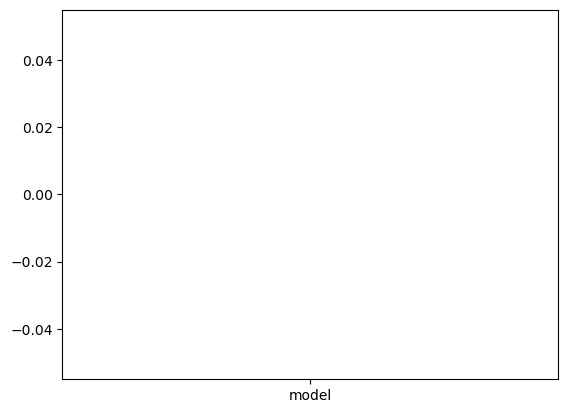

In [39]:
import pandas as pd

# Step 1: Read the CSV file
def read_data(file_path):
    return pd.read_csv(file_path)

# Step 2: Perform EDA (Exploratory Data Analysis)
def perform_eda(df):
    # Check for missing values
    print("Missing values:\n", df.isnull().sum())

    # Check for data types
    print("\nData types:\n", df.dtypes)

    # Get basic statistical summary
    print("\nStatistical summary:\n", df.describe())

    # Check for duplicates
    print("\nDuplicate rows:", df.duplicated().sum())

    # Check for outliers (for numerical columns)
    print("\nOutliers detection:")
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        print(f"{col}:")
        print(df[col].plot(kind='box'))

# Step 3: Clean the Data
def clean_data(df):
    # Step 1: Clean the price column (remove currency symbol and commas)
    df['price'] = df['price'].replace({'₨': '', 'Rs.': '', ',': ''}, regex=True)
    
    # Step 2: Convert the cleaned price to numeric, coercing errors into NaN
    df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Non-numeric values will become NaN
    
    # Step 3: Clean model column (remove "Model: " and extra spaces)
    df['model'] = df['model'].astype(str).str.replace("Model: ", "", regex=False).str.strip()

    # Step 4: Clean features column (removing unnecessary characters, e.g., \xa0)
    df['features'] = df['features'].apply(lambda x: [feature.replace('\xa0', ' ').strip() for feature in eval(x)])

    # Step 5: Handle missing values if necessary (e.g., fill with "No Info" or mean for price)
    df['model'] = df['model'].fillna('No Model')
    df['features'] = df['features'].apply(lambda x: x if isinstance(x, list) else [])
    
    # Step 6: Handle missing price values, fill with 0 or another strategy (e.g., mean)
    df['price'] = df['price'].fillna(0)  # You can change this to fill with mean or other values if preferred

    return df




# Step 4: Save the Cleaned Data
def save_data(df, output_file_path):
    df.to_csv(output_file_path, index=False)


def merge_data(inputFiles, outputFile, store_names):
    zestro_df = pd.read_csv(inputFiles[0])
    galaxy_df = pd.read_csv(inputFiles[1])
    
    # Step 2: Add the 'store' column
    zestro_df['store'] = store_names[0]
    galaxy_df['store'] = store_names[1]
    
    # Step 3: Concatenate the two DataFrames
    merged_df = pd.concat([zestro_df, galaxy_df], ignore_index=True)
    
    # Step 4: Save the merged data to a new CSV file
    merged_df.to_csv(outputFile, index=False)
    
    print(f"Data merged and saved to: {outputFile}")
    

input_files = ['../data/scraped/zestro.csv', '../data/scraped/galaxy.csv']
output_files = ['../data/cleaned/zestro.csv', '../data/cleaned/galaxy.csv']

# Read data
for i in range(len(input_files)):
    df = read_data(input_files[i])

    # Perform EDA
    perform_eda(df)
    
    # Clean the data
    cleaned_df = clean_data(df)
    
    # Save cleaned data
    save_data(cleaned_df, output_files[i])

    print("Data cleaned and saved to:", output_files[i])

merge_data(output_files, '../data/cleaned/merged_data.csv', ['Zestro', 'Galaxy'])

